In [52]:
import os
import sys

# configuring to  access the  AIMA repo and access some extras
if sys.platform == "win32":
    module_path = os.path.abspath(os.path.join('..\..'))
    ExtraFolderPath = os.path.abspath(os.path.join('..\EXTRA_DIR'))
else:
    module_path = os.path.abspath(os.path.join('../..'))
    ExtraFolderPath = os.path.abspath(os.path.join('../EXTRA_DIR'))
    
if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(ExtraFolderPath)
sys.path.insert(1, module_path) 
sys.path.insert(2, module_path)

In [53]:
from agents import *
from notebook import psource



* In this context what we examine is the taxi driver world.Here the taxi driver is supposed to be driving in pre determined pattern {zig zag} , find a customer and drop him to the desired location.
* There are some more variables such as fuel levels and cab occupancy.

* **The problem can be formulated as follows:**

    *  Initial state: Any state can be designated as the initial state however i have assumed it to be [0,0] 
    *  Actions: In this simple environment, each state has just following  actions: turn Left or  Right if a bump has been detected, move forward , pickup and drop a customer and fill petrol.
    *  Goal test: This whether all the existing customers have been serviced given adequate fuel levels. 
    *  Path cost: Each step costs 5 units of fuel. The agent would die if it runs out of fuel. 

 

## Below is the PEAS description of the environment


<img src="https://www.dropbox.com/s/2p8n4a7h3gn5d5t/PEAS_agent.PNG?raw=1" alt="data1" border="0">
    

## Simple Reflex Agent

Mechanics of the World
* This is a dumb taxi driver who only knows to follows a zig zag pattern to drive around the world.
* if the cab is empty and a customer is identified it picks up the customer. Does not on board the other customer
  unless current one is droppped and hence that customer is dropped from the environment.
    
Rules of the world:
    * Each move will consume 2 units of petrol.
    * The agent will die once it runs out of petrol.
    * Fills up the petrol if the fuel level is below 50.
    * Every fill up adds 30 units to the tank.
    * 
    
Condition Under which game is complete:
    * Once all the customers have been served.
    * Agent dies if runs out of fuel.

Drawbacks:
    * Does not find the shorter path to the customer by moving up, down , right , left and digonally.
    * Does not travel backward, agent will fail if the customer drop location is earlier than the pick up location.

Pros:
    * As this is a simple reflex agent it may sometime end up finding shortest path faster than the other agents 
      as there is no need to compute the path to follow to the customer.
        
    


## Below is the Simple Reflex Agent


<img src="https://www.dropbox.com/s/0ep9tqo5c6ghxhh/SimpleReflexAgent.PNG?raw=1" alt="data1" border="0">
    
    
    

In [54]:
class TheDumbTaxiDriver(Agent):
    current_cust_drop_loc=[2,2]
    is_customer_in=False
    iteration=0
    hops=0
    location=[0,1]
    direction=Direction('right')
    fuel_level=80
    def drive(self,thing):
        if  isinstance(thing,Customer):
            print('The agent is driving')
            return True
        else:
            False
    def hasEnoughFuel(self):
        if (self.fuel_level==0):
            return False
        else:
            return True
        
    def consumeFuel(self):
        self.fuel_level-=2
        self.hops+=1
        
        return True
    
    def fillup(self,thing):
        if isinstance(thing,Petrol) and (self.fuel_level<50):
        
            print('Petrol low!!The agent is filling up gas..fuel level:{}'.format(self.fuel_level))
            self.fuel_level+=30
            return True
        else:
            print('Petrol enough!!The agent decided not to fill up gas..fuel_level:{}'.format(self.fuel_level))
            return False
        
        return False
    
    ''''def movedown(self):
        self.location += 1''' 
    
    def turn(self,d):
        print('Inside turn..turning {}'.format(d))
        self.direction= self.direction+d
    
    def moveforward(self, success=True):
        '''moveforward possible only if success (i.e. valid destination location)'''
        self.consumeFuel()
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
        
        
        


In [55]:
class Customer(Thing):
    def __init__(self,drop_location=[1,1]):
        self.drop_location=drop_location
    
class Petrol(Thing):
    pass
class Bump(Thing):
    pass

    

class City(GraphicEnvironment):
    def percept(self, agent):
        things=self.list_things_at(agent.location)
        
        
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
            
        return things

    def execute_action(self, agent, action):
        print('Inside Execute Action for Iteration:{0}  and action:{1} with direction:{2} and fuel level:{3}'.format(agent.iteration,action,agent.direction.direction,agent.fuel_level) )
        agent.iteration += 1
        if(agent.hasEnoughFuel()):
        
        
        
        
            if (action == 'turn'  and agent.direction.direction=='right'):

                agent.location[1] += 1
                agent.direction.direction ='left'
                agent.consumeFuel()
                print('turn and Right at  location:{0}  and action:{1} with direction:{2}'.format(agent.location,action,agent.direction.direction) )

            elif (action == 'turn'  and agent.direction.direction=='left' ):

                agent.location[1] += 1
                agent.direction.direction ='right'
                agent.consumeFuel()
                print('turn and Left at  location:{0}  and action:{1} with direction:{2}'.format(agent.location,action,agent.direction.direction) )

            elif action=='moveforward':

                if agent.direction.direction == Direction.R:
                    agent.location[0] += 1

                elif agent.direction.direction == Direction.L:
                    agent.location[0] -= 1
                agent.consumeFuel()
                


            if action=='pickup':
                    print('Action is to pick  up a customer..')
                    things=self.list_things_at(agent.location,tclass=Customer)
                    if agent.is_customer_in==False:
                        if len(things)!= 0:
                            agent.is_customer_in=True
                            thing = things[0]
                            agent.current_cust_drop_loc=thing.drop_location
                            print('Driver found a customer at location  {} and boarded him '.format(agent.location))
                            agent.drive(thing)                   
                            self.delete_thing(things[0])
                    else:
                        self.delete_thing(things[0])
                        print('Agent decided not to board the new customer coz there is an existing customer')
                        agent.moveforward()
                    agent.consumeFuel()
            if action == 'fillup':
                    things=self.list_things_at(agent.location,tclass=Petrol)
                    if len(things)!= 0:
                        agent.fillup(things[0])
                        print('Agent found a gas station at location:{0} and petrol level:{1}'.format(agent.location,agent.fuel_level))
                        self.delete_thing(things[0])

            if agent.location==agent.current_cust_drop_loc and agent.is_customer_in==True:
                print('dropping off the current customer to the drop location')
                agent.is_customer_in=False                
        else:
            agent.alive=False            
            print('Agent has run out of gas.Agent is dead.')               
        
        return action
    
    
    def is_done(self):
     
        no_edibles = not any(isinstance(thing, Customer) or isinstance(thing, Petrol) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        if(no_edibles):
            print('No more work  today..Let"s rest')
        return no_edibles or dead_agents
    

In [56]:
def program(percepts):
    
    for percept in percepts:
        
        if isinstance(percept,Customer):
            
            return 'pickup'
        elif isinstance(percept,Petrol):
            return 'fillup'
        elif isinstance(percept,Bump):
            
            return 'turn'

    
    return 'moveforward'


        
    

In [57]:
#Colors description
#Red = Agent
#Blue = Cutomer
#Orange= Petrol pumps

import random
size_of_x=10
size_of_y=3
a=random.randint(0,size_of_x-1)
b=random.randint(0,size_of_y-1)
print(a,b)
city = City(size_of_x,size_of_y, color={'TheDumbTaxiDriver': (200,0,0), 'Customer': (0, 200, 200), 'Petrol': (230, 115, 40)}) # park width is set to 5, and height to 20
theDumbTaxiDriver = TheDumbTaxiDriver(program)
customer = Customer(drop_location=[2,1])
customer2 = Customer(drop_location=[2,2])
customer3 = Customer(drop_location=[5,2])
petrol = Petrol()
more_petrol=Petrol()
city.add_thing(theDumbTaxiDriver,[0,0])
city.add_thing(customer, [random.randint(0,size_of_x-1),random.randint(0,size_of_y-1)])
city.add_thing(customer2,[random.randint(0,size_of_x-1),random.randint(0,size_of_y-1)])
city.add_thing(customer3,[random.randint(0,size_of_x-1),random.randint(0,size_of_y-1)])
city.add_thing(petrol,   [random.randint(0,size_of_x-1),random.randint(0,size_of_y-1)])
#city.add_thing(more_petrol,[1,0])

city.run(28)



0 0


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:0  and action:moveforward with direction:right and fuel level:80


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:1  and action:moveforward with direction:right and fuel level:78


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:2  and action:moveforward with direction:right and fuel level:76


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:3  and action:moveforward with direction:right and fuel level:74


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:4  and action:moveforward with direction:right and fuel level:72


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:5  and action:moveforward with direction:right and fuel level:70


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:6  and action:moveforward with direction:right and fuel level:68


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:7  and action:moveforward with direction:right and fuel level:66


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:8  and action:moveforward with direction:right and fuel level:64


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:9  and action:turn with direction:right and fuel level:62
turn and Right at  location:[9, 1]  and action:turn with direction:left


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:10  and action:pickup with direction:left and fuel level:60
Action is to pick  up a customer..
Driver found a customer at location  [9, 1] and boarded him 
The agent is driving


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:11  and action:moveforward with direction:left and fuel level:58


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:12  and action:moveforward with direction:left and fuel level:56


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:13  and action:moveforward with direction:left and fuel level:54


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:14  and action:moveforward with direction:left and fuel level:52


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:15  and action:moveforward with direction:left and fuel level:50


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:16  and action:pickup with direction:left and fuel level:48
Action is to pick  up a customer..
Agent decided not to board the new customer coz there is an existing customer


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:17  and action:moveforward with direction:left and fuel level:44
dropping off the current customer to the drop location


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:18  and action:moveforward with direction:left and fuel level:42


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:19  and action:moveforward with direction:left and fuel level:40


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:20  and action:turn with direction:left and fuel level:38
turn and Left at  location:[0, 2]  and action:turn with direction:right


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:21  and action:moveforward with direction:right and fuel level:36


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:22  and action:moveforward with direction:right and fuel level:34


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:23  and action:moveforward with direction:right and fuel level:32


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:24  and action:pickup with direction:right and fuel level:30
Action is to pick  up a customer..
Driver found a customer at location  [3, 2] and boarded him 
The agent is driving


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:25  and action:moveforward with direction:right and fuel level:28


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:26  and action:moveforward with direction:right and fuel level:26


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Inside Execute Action for Iteration:27  and action:moveforward with direction:right and fuel level:24


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


## GOAL BASED AGENT

# **Mechanics of the World**
* This is a Little Smart taxi driver who only knows to **move , down , right and left to drive around the world**.
* if the cab is empty and a customer is identified it picks up the customer. Does not on board the other customer
  unless current one is droppped and hence that customer is dropped from the environment.
    
**Rules of the world:**
    * Each move will consume 5 units of petrol.
    * The agent will die once it runs out of petrol.
    * Fills up the petrol if the fuel level is below 50.
    * Every fill up adds 30 units to the tank.
    * 
    
**Condition Under which game is complete:**
    * Once all the customers have been served.
    * Agent dies if runs out of fuel.

**Drawbacks:**
    * Finds the shorter path to the customer by moving up, down , right , left but doesnt move diagnal.
    * Does not estimate if fuel will be enough to reach the customer and hence may run out of fuel and die any time.
    * This agent is not smart enough to locate the nearest customer and service him first , this shall improve utilization

**Pros:**
    * This provides more optimum solution as compared to simple reflex as it can move left , right, up and down

## Cases under which agent may fail.
1. As this does not check fuel and reach the nearest pump if needed.It may die while servicing the customer.

## Below is the Goal BAsed  Agent
* As in the below image :
    * Follows the First Come Basis to serve the customers.






<img src="https://www.dropbox.com/s/gqbskt6wnsnhqg9/GoalBAsedAgent.PNG?raw=1" alt="data1" border="0">

In [20]:
class TheDumbTaxiDriver(Agent):
    current_cust_drop_loc=[2,2]
    is_customer_in=False
    iteration=0
    location=[0,1]
    direction=Direction('right')
    fuel_level=30
    def drive(self,thing):
        if  isinstance(thing,Customer):
            print('The agent is driving')
            return True
        else:
            False
    def hasEnoughFuel(self):
        if (self.fuel_level==0):
            return False
        else:
            return True
        
    def consumeFuel(self):
        self.fuel_level-=5
        return True
    
    def fillup(self,thing):
        if isinstance(thing,Petrol) and (self.fuel_level<50):
        
            print('Petrol low!!The agent is filling up gas..fuel level:{}'.format(self.fuel_level))
            self.fuel_level+=30
            return True
        else:
            print('Petrol enough!!The agent decided not to fill up gas..fuel_level:{}'.format(self.fuel_level))
            return False
        
        return False
    
    ''''def movedown(self):
        self.location += 1''' 
    
    def turn(self,d):
        print('Inside turn..turning {}'.format(d))
        self.direction= self.direction+d
    
    def moveforward(self, success=True):
        '''moveforward possible only if success (i.e. valid destination location)'''
        self.consumeFuel()
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
        
        
        


In [21]:
class Customer(Thing):
    def __init__(self,drop_location=[1,1]):
        self.drop_location=drop_location
    
class Petrol(Thing):
    pass
class Bump(Thing):
    pass

    

class City(GraphicEnvironment):
    clues={
               'customers':[],
               'petrol_pumps':[]
              }
    def percept(self, agent):
        things=self.list_things_at(agent.location)
        
        
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
            
        return things
    
    def lookForCustomers(self, agent):
        things=self.list_things_at(agent.location)
        x=self.width
        y=self.height
        for x in range(10):
            for y in range(3):                
                customers=self.list_things_at([x,y],tclass=Customer)
                
                if(len(customers)!= 0):
                    for customer in customers:
                        self.clues['customers'].append([x,y])
                        print('Found and loaded the customer in the list at loc: {0},{1}'.format(x,y))
                
        
        return True
    
    def findPath(self,agent,current_location,to_location):
        
        
        print('The current_location:{0} , to_location:{1} '.format(current_location,to_location))
        
        x1=current_location[0]
        y1=current_location[1]
        x2=to_location[0]
        y2=to_location[1]
        for x in range( abs(x1-x2) ):
            if   (x2-x1)>0:
                agent.location[0]+=1
                self.reveal()
                print('The current_location:{0} , to_location:{1} '.format(agent.location,to_location))
            elif (x2-x1)<0:
                agent.location[0]-=1
                self.reveal()
                print('The current_location:{0} , to_location:{1} '.format(agent.location,to_location))
            else:
                pass
                
        for y in range( abs(y1-y2) ):
            if   (y2-y1)>0:
                agent.location[1]+=1
                self.reveal()
                print('The current_location:{0} , to_location:{1} '.format(agent.location,to_location))
            elif (y2-y1)<0:
                agent.location[1]-=1
                self.reveal()
                print('The current_location:{0} , to_location:{1} '.format(agent.location,to_location))
            else:
                pass
        if agent.location==to_location:
            print('Huuray!! Found my customer or dropped customer!!')
            return True
    
    def execute_action(self, agent, action):
        print('The width :{0} and height :{1} of the matrix is'.format(self.width,self.height))
        print('Inside Execute Action for Iteration:{0}  and action:{1} with direction:{2} and fuel level:{3}'.format(agent.iteration,action,agent.direction.direction,agent.fuel_level) )
        agent.iteration += 1
        self.lookForCustomers(agent)
        
        cust_pickup_location=self.clues['customers'][0]
        things=self.list_things_at(cust_pickup_location,tclass=Customer)
        cust_drop_location=things[0].drop_location
        
        if( self.findPath(agent,agent.location,cust_pickup_location) ):
            self.delete_thing(things[0])
            if (self.findPath(agent,agent.location,cust_drop_location) ):
                self.clues['customers'].pop(0)                            
                print('The remaining list of customers with the driver:{} '.format(self.clues['customers'])  )

        return action
    
    
    def is_done(self):
     
        no_edibles = not any(isinstance(thing, Customer) or isinstance(thing, Petrol) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        if(no_edibles):
            print('No more work  today..Let"s rest')
        return no_edibles or dead_agents
    

In [22]:
def program(percepts):
    
    for percept in percepts:
        
        if isinstance(percept,Customer):
            
            return 'pickup'
        elif isinstance(percept,Petrol):
            return 'fillup'
        elif isinstance(percept,Bump):
            
            return 'turn'

    
    return 'moveforward'


        
    

In [23]:
#Colors description
#Red = Agent
#Blue = Cutomer
#Orange= Customer Drop locations

city = City(10,3, color={'TheDumbTaxiDriver': (200,0,0), 'Customer': (0, 200, 200), 'Petrol': (230, 115, 40)}) # park width is set to 5, and height to 20
theDumbTaxiDriver = TheDumbTaxiDriver(program)
customer = Customer(drop_location=[2,1])
customer2 = Customer(drop_location=[7,2])
customer3 = Customer(drop_location=[3,2])
petrol = Petrol()
more_petrol=Petrol()
city.add_thing(theDumbTaxiDriver,[0,0])
city.add_thing(customer3,[3,1])
city.add_thing(customer2,[5,2])
city.add_thing(customer,[6,0])
#city.add_thing(petrol,[0,1])
#city.add_thing(more_petrol,[1,0])

city.run(20)



,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The width :10 and height :3 of the matrix is
Inside Execute Action for Iteration:0  and action:moveforward with direction:right and fuel level:30
Found and loaded the customer in the list at loc: 3,1
Found and loaded the customer in the list at loc: 5,2
Found and loaded the customer in the list at loc: 6,0
The current_location:[0, 0] , to_location:[3, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[1, 0] , to_location:[3, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[2, 0] , to_location:[3, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[3, 0] , to_location:[3, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[3, 1] , to_location:[3, 1] 
Huuray!! Found my customer or dropped customer!!
The current_location:[3, 1] , to_location:[3, 2] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[3, 2] , to_location:[3, 2] 
Huuray!! Found my customer or dropped customer!!
The remaining list of customers with the driver:[[5, 2], [6, 0]] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The width :10 and height :3 of the matrix is
Inside Execute Action for Iteration:1  and action:moveforward with direction:right and fuel level:30
Found and loaded the customer in the list at loc: 5,2
Found and loaded the customer in the list at loc: 6,0
The current_location:[3, 2] , to_location:[5, 2] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[4, 2] , to_location:[5, 2] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[5, 2] , to_location:[5, 2] 
Huuray!! Found my customer or dropped customer!!
The current_location:[5, 2] , to_location:[7, 2] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[6, 2] , to_location:[7, 2] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[7, 2] , to_location:[7, 2] 
Huuray!! Found my customer or dropped customer!!
The remaining list of customers with the driver:[[6, 0], [5, 2], [6, 0]] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The width :10 and height :3 of the matrix is
Inside Execute Action for Iteration:2  and action:moveforward with direction:right and fuel level:30
Found and loaded the customer in the list at loc: 6,0
The current_location:[7, 2] , to_location:[6, 0] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[6, 2] , to_location:[6, 0] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[6, 1] , to_location:[6, 0] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[6, 0] , to_location:[6, 0] 
Huuray!! Found my customer or dropped customer!!
The current_location:[6, 0] , to_location:[2, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[5, 0] , to_location:[2, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[4, 0] , to_location:[2, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[3, 0] , to_location:[2, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[2, 0] , to_location:[2, 1] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The current_location:[2, 1] , to_location:[2, 1] 
Huuray!! Found my customer or dropped customer!!
The remaining list of customers with the driver:[[5, 2], [6, 0], [6, 0]] 


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


The width :10 and height :3 of the matrix is
Inside Execute Action for Iteration:3  and action:moveforward with direction:right and fuel level:30


IndexError: list index out of range

In [13]:
## UTILITY BASED AGENT

In [14]:
from agents import *
from notebook import psource


# **Mechanics of the World**
* This is a Little Smart taxi driver who only knows to **move , down , right and left to drive around the world**.
* if the cab is empty and a customer is identified it picks up the customer. Does not on board the other customer
  unless current one is droppped and hence that customer is dropped from the environment.
    
**Rules of the world:**
    * Each move will consume 5 units of petrol.
    * The agent will die once it runs out of petrol.
    * Fills up the petrol if the fuel level is below 50.
    * Every fill up adds 30 units to the tank.
    * 
    
**Condition Under which game is complete:**
    * Once all the customers have been served.
    * Agent dies if runs out of fuel.

**Drawbacks:**
    NA

**Pros:**
    1. This provides the most optimum solution as it can move left , right, up  down and diagonally
    2. Collects all the locations of the customers and petrol pumps avaiable in the enviroments.
    3. * **Based on the avaiable list of customer locations chooses the nearest customer to service.**
    4. * **Before moving to service any customer the agent first checks if there is enough fuel to reach the customer, if not the agent first moves to a petrol pump to fill up the tank.**


## Below is how the Utility Based Agent operates:
1. Agent checks and decides that fuel is not enought to service the customer.
2. Moves to aa petrol pump to fill up.
3. Once filling, locates the nearest customer (Green)
4. Drop the Green CUstomer to the drop location.
5. Loactes the next nearest customer.
6  Picks up yellow customer.
7. Drops yellow customer.
8. Agent relaxes as no more customers.




<img src="https://www.dropbox.com/s/bjgo75mpuhp4d80/UtilityBasedAgent.PNG?raw=1" alt="data1" border="0">

## Cases under which Utility Goal may Fail:
* 1. When agent does not even have enough fuel to reach the nearest fuel station.Agent will die.


In [ ]:
class TheDumbTaxiDriver(Agent):
    current_cust_drop_loc=[2,2]
    is_customer_in=False
    iteration=0
    location=[0,1]
    direction=Direction('right')
    fuel_level=15
    def drive(self,thing):
        if  isinstance(thing,Customer):
            print('The agent is driving')
            return True
        else:
            False
    def hasEnoughFuel(self):
        if (self.fuel_level==0):
            return False
        else:
            return True
        
    def consumeFuel(self):
        self.fuel_level-=5
        return True
    
    def fillup(self,thing):
        if isinstance(thing,Petrol) and (self.fuel_level<20):
        
            print('Petrol low!!The agent is filling up gas..fuel level:{}'.format(self.fuel_level))
            self.fuel_level=100
            return True
        else:
            print('Petrol enough!!The agent decided not to fill up gas..fuel_level:{}'.format(self.fuel_level))
            return False
        
        return False
    
    def fillup(self):
        if (self.fuel_level<20):
        
            print('Petrol low!!The agent is filling up gas..fuel level:{}'.format(self.fuel_level))
            self.fuel_level=100
            return True
        else:
            print('Petrol enough!!The agent decided not to fill up gas..fuel_level:{}'.format(self.fuel_level))
            return False
        
        return False
    
    ''''def movedown(self):
        self.location += 1''' 
    
    def turn(self,d):
        print('Inside turn..turning {}'.format(d))
        self.direction= self.direction+d
    
    def moveforward(self, success=True):
        '''moveforward possible only if success (i.e. valid destination location)'''
        self.consumeFuel()
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
    
    def findNearestPump(self,pump_locations):
        lowestcost=1000
        lowest_cost_location=[]
        for pump_location in pump_locations:
            count=self.findDistance(self.location,pump_location)
            if(count<lowestcost):
                lowestcost=count
                lowest_cost_location=pump_location
        print('The Lowest Count is :{0} for location :{1} '.format(lowestcost,lowest_cost_location))
        return lowest_cost_location
        
    def findDistance(self,current_location,to_location):
        x1=current_location[0]
        y1=current_location[1]
        x2=to_location[0]
        y2=to_location[1]
        count=0
        num_steps=0
#         print('Count:',count)
        for x in range(abs(y2-y1)):   
            if(y2>y1):
                print('a')

                if   (x2>x1):
                    #print('aa')
                    x1+=1 
                    y1+=1
                    count+=1

                elif (x2<x1):
                    #print('ab')
                    x1-=1
                    y1+=1
                    count+=1


            elif (y2<y1):
#                 print('b')

                if   (x2>x1):
#                     print('ba')
                    y1-=1
                    x1+=1

                elif (x2<x1):
#                     print('bb')
                    y1-=1
                    x1-=1
                    count+=1

                else:
#                     print('bc')
                    pass


        if(y1!=y2):
            num_steps=abs(y1-y2)+1
        elif(x1!=x2):
            num_steps=abs(x1-x2)+1



        for x in range(num_steps):
            if   x2>x1:
                x1+=1
                count+=1

            elif x2<x1:
                x1-=1
                count+=1

        for z in range(num_steps):
            if(y2>y1):
                y1+=1
                count+=1
                 

            elif(y2<y1):
                y1-=1
                count=count+1
                 
        
        return count





In [17]:
class Customer(Thing):
    def __init__(self,drop_location=[1,1]):
        self.drop_location=drop_location
    
class Petrol(Thing):
    pass
class Bump(Thing):
    pass

class DropLocation(Thing):
    drop_location=[]
    pass

class City(GraphicEnvironment):
    clues={
               'customers':[],
               'petrol_pumps':[]
              }
    def percept(self, agent):
        things=self.list_things_at(agent.location)
        
        
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
            
        return things
    
    def lookForCustomers(self, agent):
        things=self.list_things_at(agent.location)
        col=self.width
        rows=self.height
        for x in range(col):
            for y in range(rows):                
                customers=self.list_things_at([x,y],tclass=Customer)
                
                if(len(customers)!= 0):
                    for customer in customers:
                        self.clues['customers'].append([x,y])
                        print('Found and loaded the customer in the list at loc: {0},{1}'.format(x,y))
                
                petrols=self.list_things_at([x,y],tclass=Petrol)
                
                if(len(petrols)!= 0):
                    for petrol in petrols:
                        self.clues['petrol_pumps'].append([x,y])
                        print('Found and loaded the petrol in the list at loc: {0},{1}'.format(x,y))
                
        
        return True
    
    def findPath(self,agent,current_location,to_location):
        print('type of self: ',type(self))
        
        
        print('The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
        
        [x1,y1]=current_location        
        [x2,y2]=to_location        
        num_steps=0
        
        for x in range(1, abs(y2-y1)+1 ):
            if not(agent.hasEnoughFuel()):
                return False
            print('Hello ',agent.location)
            if(y2>agent.location[1]):

                if   ( x2>agent.location[0] ):
                    agent.location[1]+=1
                    agent.location[0]+=1 
                    agent.consumeFuel()
                    self.reveal()
                    
                elif ( x2<agent.location[0] ):
                    agent.location[1]+=1
                    agent.location[0]-=1 
                    agent.consumeFuel()
                    self.reveal()
                    
                print('1.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
                
            elif ( y2<agent.location[1] ):
                
                if   ( x2>agent.location[0] ):
                    agent.location[1]-=1
                    agent.location[0]+=1
                    agent.consumeFuel()
                    self.reveal()
                    
                elif ( x2<agent.location[0] ):
                    
                    agent.location[1]-=1
                    agent.location[0]-=1
                    agent.consumeFuel()
                    self.reveal()
            
                print('2.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
            else:
                pass
            
        if  (agent.location[0]!=x2):
            num_steps=abs(agent.location[0]-x2)+1
        elif(agent.location[1]!=y2):
            num_steps=abs(agent.location[1]-y2)+1            
            
        for x in range(1, num_steps ):
            if not(agent.hasEnoughFuel()):
                return False
            
            elif (x2>agent.location[0]):
                agent.location[0]+=1
                agent.consumeFuel()
                self.reveal()
                print('3.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
            elif (x2<agent.location[0]):
                agent.location[0]-=1
                agent.consumeFuel()
                self.reveal()
                print('4.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
            else:
                pass
            
            
            
        for y in range(1,num_steps):
            if not(agent.hasEnoughFuel()):
                return False
            
            elif (y2>agent.location[1]):
                agent.location[1]+=1
                self.reveal()
                print('5.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
            elif (y2<agent.location[1]):
                agent.location[1]-=1
                agent.consumeFuel()
                self.reveal()
                print('6.The current_location:{0} , to_location:{1} , fuel level:{2}'.format(agent.location,to_location,agent.fuel_level))
            else:
                pass
            
            
        if agent.location==to_location:
            print('Huuray!! Found my customer or dropped customer!!')
            return True
                
        
        
    
        
    
    def execute_action(self, agent, action):
        print('The width :{0} and height :{1} of the matrix is'.format(self.width,self.height))
        print('Inside Execute Action for Iteration:{0}  and action:{1} with direction:{2} and fuel level:{3}'.format(agent.iteration,action,agent.direction.direction,agent.fuel_level) )
        agent.iteration += 1
        self.lookForCustomers(agent)
        print('List of Customers:{0}  and list of petrol pumps:{1}'.format(self.clues['customers'],self.clues['petrol_pumps']))
        if(agent.fuel_level<=20):
            nearest_pump_loc=agent.findNearestPump(self.clues['petrol_pumps'])
            self.findPath(agent,agent.location,nearest_pump_loc)
            agent.fillup()
        if(len(self.clues['customers'])!=0):    
            cust_pickup_location=self.clues['customers'][0]
            things=self.list_things_at(cust_pickup_location,tclass=Customer)
            cust_drop_location=things[0].drop_location

            if( self.findPath(agent,agent.location,cust_pickup_location) ):
                self.delete_thing(things[0])

                if (self.findPath(agent,agent.location,cust_drop_location) ):
                    self.clues['customers'].pop(0)                            
                    print('The remaining list of customers with the driver:{} '.format(self.clues['customers'])  )             
                else:
                    agent.alive=False            
                    print('Agent has run out of gas.Agent is dead.')

            else:
                agent.alive=False            
                print('Agent has run out of gas.Agent is dead.')
        else:
            self.is_done()
        return action
    
    
    def is_done(self):
        out_of_fuel=False
        no_edibles = not any(isinstance(thing, Customer)  for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        for agent in self.agents:
            if(agent.fuel_level==0):               
                out_of_fuel=True
        if(no_edibles):
            print('No more work  today..Let"s rest')
        return no_edibles or dead_agents or out_of_fuel
    

In [18]:
def program(percepts):
    
    for percept in percepts:
        
        if isinstance(percept,Customer):
            
            return 'pickup'
        elif isinstance(percept,Petrol):
            return 'fillup'
        elif isinstance(percept,Bump):
            
            return 'turn'

    
    return 'moveforward'


        
    

city = City(10,5, color={'TheDumbTaxiDriver': (200,0,0), 'DropLocation':(200,100,165), 'Customer': (0, 200, 200), 'Petrol': (230, 115, 40)}) # park width is set to 5, and height to 20
theDumbTaxiDriver = TheDumbTaxiDriver(program)

customer = Customer(drop_location=[2,1])
customer2 = Customer(drop_location=[7,2])
customer3 = Customer(drop_location=[0,0])
drop_location3=DropLocation()
drop_location2=DropLocation()
petrol = Petrol()
more_petrol=Petrol()
city.add_thing(theDumbTaxiDriver,[0,4])
city.add_thing(customer3,[6,4])
city.add_thing(drop_location3,[0,0])
city.add_thing(drop_location2,[7,2])
city.add_thing(customer2,[5,2])
#city.add_thing(customer,[6,0])
city.add_thing(petrol,[0,1])
city.add_thing(more_petrol,[1,0])

city.run(100)



<h1 style="color: #5e9ca0;">Figure below shows the performance of discussed agents in multiple sized environemts </h1>


<img src="https://www.dropbox.com/s/93fseb2glfz5h26/Performance_Agents.PNG?raw=1" alt="data1" border="0">

<h1 style="color: #f5425d;">Part 2 of the Assignment - Search </h1>

In [26]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## CONTENTS OF THIS REPORT ON SEARCH ALGORITHMS

* Overview
* Types of Search
* Tree or Graph ??
* searches releavant to our problem
* Search Algorithms Visualization
* Breadth-First Graph Search
* Depth-First Search
* Iterative Deepening Search
* Time and Space Complexities
* Our expectations from the experiment
* Emperical Results
* Final Conclusions



## OVERVIEW

* Based on how observable the enviromnent is the search algorithms are broadly classified in to 2 main types.
    * **Uninformed Search Algorithms**
    * **Informed Search Algorithms**



* **Uninformed search algorithms**: Search algorithms which explore the search space without having any information about the problem other than its definition.
    * Examples:
        1. Breadth First Search
        2. Depth First Search
        3. Depth Limited Search
        4. Iterative Deepening Search


* **Informed search algorithms**: These type of algorithms leverage any information (heuristics, path cost) on the problem to search through the search space to find the solution efficiently.
    * Examples:
        1. Best First Search
        2. Uniform Cost Search
        3. A\* Search
        4. Recursive Best First Search



## What defines a good search solution?
* Before we get into the design of speciﬁc search algorithms, we need to consider the criteria that might be used to choose among them.
     * We can evaluate an algorithm’s performance in four ways: 
         * **Completeness**: Is the algorithm guaranteed to ﬁnd a solution when there is one? 
         * **Optimality**: Does the strategy ﬁnd the optimal solution(Solution at the lowest cost)?
         * **Time complexity**: How long does it take to ﬁnd a solution? 
         * **Space complexity**: How much memory is needed to perform the search


## UNINFORMED SEARCH
* This search is very similar to an Energetic Blid Dog which has neither any clue about the size of the state      space nor any additional clue than to compare the current state with the goal state. Hence this search methodoly is also called as the **Blind Search**
* The only way is to expand the current node and check if it is a goal node or not.

* Following are major uniformed search techiniques:
        1. Breadth First Search
        2. Depth First Search
        3. Depth Limited Search
        4. Iterative Deepening Search
        

## UNIFORMED SEARCH USING VARIOUS DATA STRUCTURES

* Following are major uniformed search techiniques can be implemented using TREE or GRAPH:           

        1. Breadth First Tree Search
        2. Depth First Tree Search
        3. Breadth First Search
        4. Depth First Graph Search
        5. Depth Limited Search
        6. Iterative Deepening Search


## TREE OR GRAPH?

* The uninformed techiniques can be implemented using the following:
    * A Tree Approach:
       * Even in a finite search space a tree search would not be a optimum approach as it may end up into infinite loops and never return any solution. Even if it does it very likely that path may be redundant added due to unneccesary loops.
    * A Graph Search:
        * The problem faced in tree approach can be solved by graph search which uses a datastructure to keep a record of all the nodes that are already explored ( avoiding redundant paths ) and another data structure to store the unexplored nodes ( avoiding infinite loops )

## This is what happens when you use a tree and it ends up into infinite loop


    



<img src="https://www.dropbox.com/s/x4x74aos8kus60s/BFS_tree_crash_shot.PNG?raw=1" alt="data1" border="0">
    

## ALGORITHMS RELEVANT TO OUR SEARCH SPACE

* Based our the previous comment it is clear that **GRAPH SEARCH** is a better approach to find solutions to our search space.This comdenses our list with only following algos.
        1. Breadth First Search
        2. Depth First Graph Search
        3. Depth Limited Search
        4. Iterative Deepening Search
        
* **We shall consider following for our analysis:**
        1. Breadth First Search
        2. Depth First Graph Search        
        4. Iterative Deepening Search


## LET US FIRST SEE HOW OUR TAXI WORLD LOOKS LIKE
* We have a Taxi Route finding problem where our agent is searching for the customer.
  The customer location is the goal state.
* Problem - is to find the optimal path from agent's current location to the customer location.

* Possible Moves agent can take : Up , Down , Right , Left , Diagonal (a shown in green below)



<img src="https://www.dropbox.com/s/qxa9kfck03jgwzs/possible_taxi_actions.PNG?raw=1" alt="data1" border="0">
    

## Let us discuss some notations which shall be used to evaluate space and time complexity:
* b = The branching factor.Since our taxi can move to 8 possible locations from current state.
      So, in our case b=8
* d = The depth of location where the shalowest goal is located.This shall depend in on the location of the goal.

* m = The maximum depth of the search space.This shall depend on the size of the environment matrix.



## Breadth First Search


* Algorithm
<img src="https://www.dropbox.com/s/xn6hu4eiyjztgd7/BFS_algo.PNG?raw=1" alt="data1" border="0">

* Visual Representation.
<img src="https://www.dropbox.com/s/hhgdgyi05eo5hi9/BreadthFirstSearch.PNG?raw=1" border="0">

        



## Generation of your search tree
* Since this is complex problem with branch factor =8 it imperative for us to use method that wouold pass all the neighbor locations adjacent to every location.Once the generation is done this is how the tree for our enviroment wouold look like.




* how your tree will look once all nodes are generated.
<img src="https://www.dropbox.com/s/tie0t9qeicotdxl/Tree_B_as_8.PNG?raw=1" border="0">
    

In [27]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

## Creating a function that would generate a tree structure specifing every neighbor from every location of the matrix

In [28]:
# Provides neighbor locations
#size_x: max x value, size_y: max y value, location_x: x codinate for current location, location_y: y cordinate for current location
def neighbors(size_x, size_y, location_x, location_y):
    X = size_x
    Y = size_y
    neighbors_2d = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                               for y2 in range(y-1, y+2)
                               if (-1 < x <= X and
                                   -1 < y <= Y and
                                   (x != x2 or y != y2) and
                                   (0 <= x2 <= X) and
                                   (0 <= y2 <= Y))]
                                   
    return neighbors_2d(location_x, location_y)
# Credit: https://stackoverflow.com/questions/22550302/find-neighbors-in-a-matrix

In [29]:
#Creates a mapping of neighbors around every location of the matrix
def find_dict_of_neighbors_for_matrix(size_x,size_y):
    
    final_dict=dict()
    
    for x in range(size_x):
        for y in range(size_y):
            dict_neighbors=dict()
            lis_of_neighbors=neighbors(size_x-1,size_y-1,x,y)
            for a in range(len(lis_of_neighbors)):
                dict_neighbors[ str(lis_of_neighbors[a][0])+'_'+str(lis_of_neighbors[a][1]) ]=1
            final_dict[str(x)+'_'+str(y)]=dict_neighbors
    return final_dict

In [30]:
def my_dictionary(size_x,size_y):
    my_dict=dict()
    for x in range(size_x):
        for y in range(size_y):
            key=str(x)+'_'+str(y)
            my_dict[key]=(x,y)
    return my_dict
            

* **Initialize the size of the matrix environment below at size_of_x,size_of_y**

In [31]:
size_of_x=10
size_of_y=10

taxi_route_finding_map = UndirectedGraph(find_dict_of_neighbors_for_matrix(size_of_x,size_of_y))

taxi_route_finding_map.locations = my_dictionary(size_of_x,size_of_y)


It is pretty straightforward to understand this `taxi_route_finding_map`. The first node **(0,0)** has three neighbours named **(0,1)**, **(1,0)**, **(1,1)**. 

And `taxi_route_finding_map.locations` contains the positions of each of the nodes. We ahve to note that **The path cost of each move is 1**

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

Say we want to start exploring from **0_0** and try to find **2_2** in our taxi_route_finding_map. So, this is how we do it.

In [32]:
taxi_route_finding_problem = GraphProblem('0_0', '2_2', taxi_route_finding_map)

Let's get started by initializing an empty graph. We will add nodes, place the nodes in their location as shown in the book, add edges to the graph.

In [33]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in taxi_route_finding_map.locations.keys()}
node_positions = taxi_route_finding_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in taxi_route_finding_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in taxi_route_finding_map.graph_dict.items() for k2, v2 in v.items()}

taxi_route_finding_graph_data = {  'graph_dict' : taxi_route_finding_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

* **Let us now visiualize the environment**

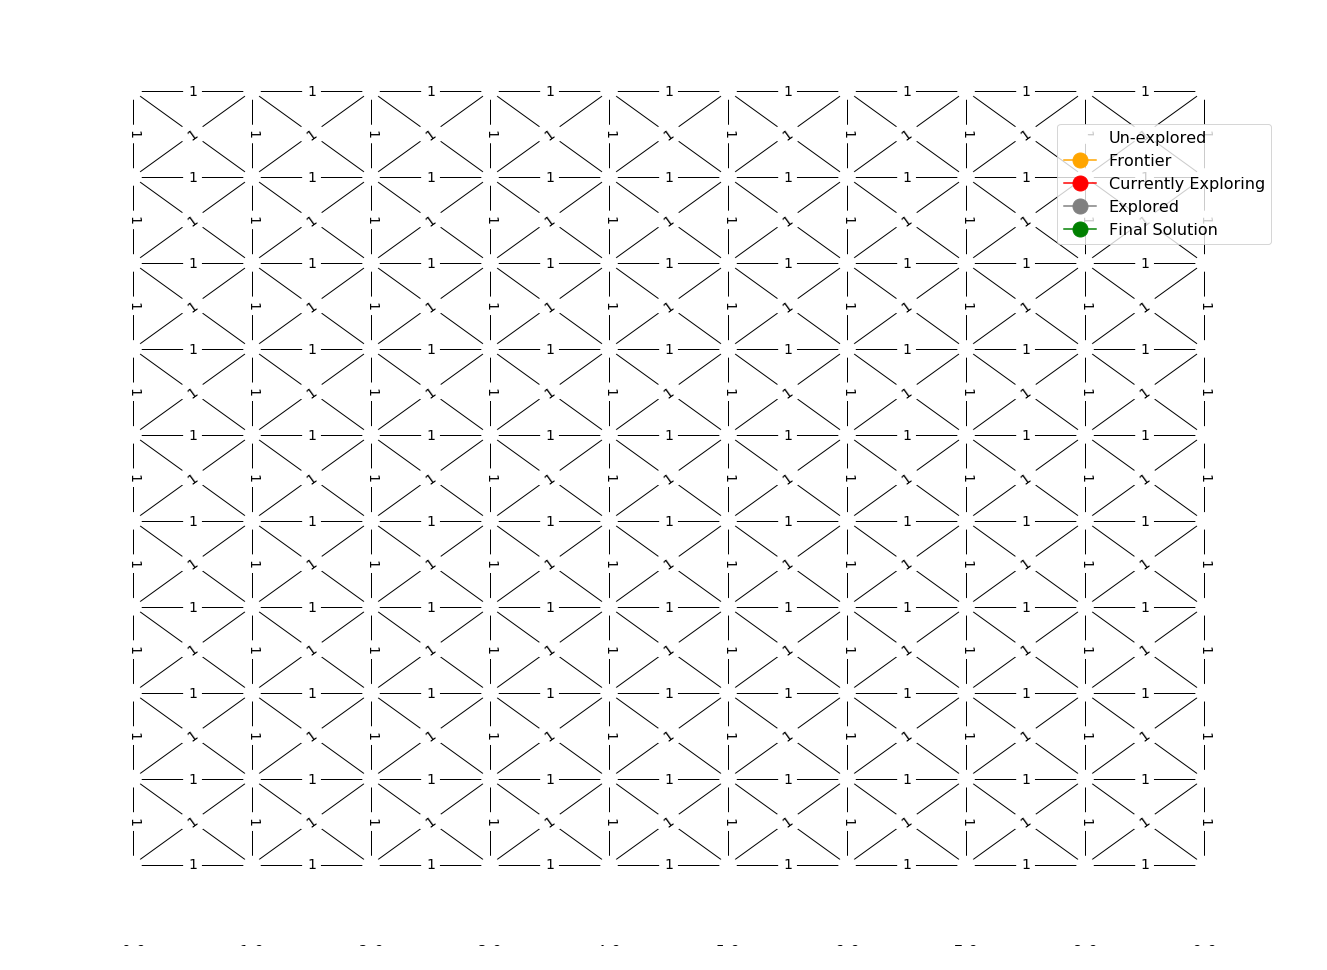

In [34]:
show_map(taxi_route_finding_graph_data)

In [35]:
start_location='0_0'
end_location  ='9_8'

## 1. BREADTH-FIRST GRAPH SEARCH

Let's change all the `node_colors` to starting position and define a different problem statement.

In [36]:
def breadth_first_search_graph(problem):
    "[Figure 3.11]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    print('Iterations required with BFS-G==>',iterations)
    return None

In [37]:
all_node_colors = []
taxi_route_finding_problem = GraphProblem(start_location, end_location, taxi_route_finding_map)
a,b,c=breadth_first_search_graph(taxi_route_finding_problem)
print('Iterations is==>',a)

'''Use below code to visualize the flow however for large environemnts it may take time to reach the goal state 
where commenting below gives faster Iteration Numbers'''

#display_visual(romania_graph_data, user_input=False, 
 #              algorithm=breadth_first_search_graph, 
 #             problem=romania_problem)

Iterations is==> 259


'Use below code to visualize the flow however for large environemnts it may take time to reach the goal state \nwhere commenting below gives faster Iteration Numbers'

## 4. DEPTH-FIRST GRAPH SEARCH 
Although we have a working implementation in search module, we have to make a few changes in the algorithm to make it suitable for visualization.

* In a DFS we visit vertices until we reach the dead end node and cannot find any non visited vertex an visit other vertex if it exists in the frontier.

## below image shall help to explain the concept
'''Referenced from medium.com'''

 <img src="https://www.dropbox.com/s/5sngs9f0wcw8mb0/DFS_tree.PNG?raw=1" border="0">
    

* Below is the implementation of Depth first Graph Search

In [40]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    print('Total Iteration count is==>',iterations)
    #return(iterations, all_node_colors, node)

In [41]:
all_node_colors = []
taxi_route_finding_problem = GraphProblem(start_location,end_location, taxi_route_finding_map)
display_visual(taxi_route_finding_graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=taxi_route_finding_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 3. ITERATIVE DEEPENING SEARCH



In [43]:
def depth_limited_search_graph(problem, limit = -1):
    '''
    Perform depth first search of graph g.
    if limit >= 0, that is the maximum depth of the search.
    '''
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of queue
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)

        elif limit >= 0:
            cutoff_occurred = True
            limit += 1
            all_node_color.pop()
            iterations -= 1
            node_colors[node.state] = "gray"

        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            limit -= 1
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return 'cutoff' if cutoff_occurred else None


def depth_limited_search_for_vis(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return(iterations, all_node_colors, node)     

In [44]:
def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node=depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

In [45]:
all_node_colors = []
taxi_route_finding_problem = GraphProblem(start_location, end_location, taxi_route_finding_map)
a,b,c=iterative_deepening_search_for_vis(taxi_route_finding_problem)
print('Iterations required with IDS-G==>',a)

#display_visual(romania_graph_data, user_input=False, 
#               algorithm=iterative_deepening_search_for_vis, 
#               problem=romania_problem)

Iterations required with IDS-G==> 228


## Enough of techinical discussions now , lets see what we have found from our emperical results.
* Below is the table which shows the time and space complexity of all 3 algorithms.


<img src="https://www.dropbox.com/s/y0jbzkbfzgnd0su/Time_space_complexity_comp.PNG?raw=1" alt="data1" border="0">

<h1 style="color: #5e9ca0;">Very Important</h1>


## Expected end results from the experiment based on theoritical computation of time and space complexity above.

* BFS may deliver optimum solution however may consume aot of memory for larger enviroments.
* DFS may deliver better solution at time when the goal is around the contours but not always.It may sometimes go 
  into infinite loop for large enviroment while searching for the dead end.DFS will mostly take longer iterations.
* Iterative deeping is the one which combines the goodness of both the above mentioned algorithms.Hence may deliver
  optimum solution while consuming lesser memory to store nodes.


<h1 style="color: #5e9ca0;">Time to verify the results</h1>

* **From the below results it seems pretty clear that BFS is far better in finding optimum solution in lesser iteration 
     than both DFS and IDFS but **is it enough to conclude ???** 

## Below are the time complexity results



<img src="https://www.dropbox.com/s/bweimsej774mh9l/results_1.PNG?raw=1" alt="data1" border="0">
<img src="https://www.dropbox.com/s/4ozd1tkldl2ez71/results_2.PNG?raw=1" alt="data1" border="0">


## EVALUATING THE SPACE COMPLEXITY
* Prima facie based on above result is easy to clonclude that BFS is better but before that let us examine 
the **SPACE COMPLEXITY**
* Below screenshots were taken of the CPU and the memory usage  when the matrix size was 100*100


<img src="https://www.dropbox.com/s/c1py181kwhxzciw/space_results.PNG?raw=1" alt="data1" border="0">

<h1 style="color: #5e9ca0;">FINAL CONCLUSIONS</h1>

1. When considered to provide optimum path in lesser iterations BFS is clearly a good choice however as the size increases BFSs  memory utilization exponentially increases with size of the environment(over 10GB with matrix size of 100*100).This makes BFS not a good chice for better space search problems.

2. DFS consumes lesser memory however may go into infinite loop for bigger matrix size (takes 39000+ iterations in a            100*100 matrix.May never come back if the goal node is at one of the shallowest location.)

3. IDFS combines the goodness of both i.e lesser memory, faster solution.IDFS is thus  COMPLETE , OPTIMUM

<h1 style="color: #5e9ca0;">I would choose IDFS a the search algorithm in my taxi world problem </h1>

## Below is a screen shot of the memory usage during a DFS using a 100*100 marix

<img src="https://www.dropbox.com/s/ac8glgxk1sgy5h7/CPU_util_BFS_100_100.png?raw=1" alt="data1" border="0">

<h1 style="color: #f5425d;">Part 3 of the Assignment - Backward and Forward Chaining </h1>

* AND OR is  graphical representaion of the reductions of the  goal state by conjuction and dijunction of goals.
  AND oR is a generalization of directed graph which vertices connected.An AND operator connects two logically connected OR operator where as a OR opeartor connects two logically connected AND operators.
* These connection of operators are used to optimize the search state and optimize the path to the goal state.


## Forward Chaining
     1.Starts from known facts and applies inference rule to extract more data
     2.Bottom-up approach
     3.Forward chaining is known as data-driven inference
     4.Forward chaining reasoning applies a breadth-first search strategy
     5.Forward chaining is suitable for the planning, monitoring, control, and interpretation application
     6.Operates in the forward direction.

## Backward Chaining:
    1.starts from the goal and works backward
    2.Uses inference rules to find the required facts that support the goal.
    3.top-down approach
    4.Backward chaining reasoning applies a depth-first search strategy.
    5.Only tests for few required rules.
    6.tests for few required rules
    7.suitable for diagnostic, prescription, and debugging application
    8.Generates a finite number of possible conclusions.
    9.Operates in the backward direction.




Ref: https://www.javatpoint.com/difference-between-backward-chaining-and-forward-chaining
